#<a name='9'></a>
<div dir='rtl'>
<h1>9. تخمین توزیع بتا</h1>
</div>

<div dir='rtl'>
در مطالب تدریسی مشاهده کردید که توزیع بتا یک توزیع منعطف، با توانایی اعمال محدوده سخت برای مقادیر متغیر تصادفی خود است. از این رو، این توزیع یک کاندید مناسب برای مدل کردن توزیع متغیر‌های تصادفی‌ای است که مقادیر آن‌ها محدود به یک بازه خاص است. برای برازش این توزیع بر روی مشاهدات، می‌توان از تخمین بیزی برای تخمین پارامتر‌های توزیع استفاده کرد. در این تمرین از بازپیاده سازی محاسبات خودداری کرده و از قابلیت‌های زبان R استفاده خواهیم کرد.
</div>

<div dir='rtl'>
پیش‌تر سعی بر تخمین عملکرد نهایی دانشجویان درس ریاضیات گسسته در امتحان نهایی کردیم. اما در آن زمان، نمرات را به دو دسته pass و fail
تقسیم کردیم تا بتوانیم از توزیع برنولی استفاده کنیم. اما اگر بخواهیم توزیعی برای مقدار دقیق نمرات داشته باشیم باید چه کنیم؟ می‌دانیم محدوده نمرات محدود است (در دادگان ما این نمرات به بازه صفر تا صد نگاشت شده‌اند). بنابراین برازش توزیع بتا بر روی آن‌ها می‌تواند نتایج مطلوبی به دنبال داشته باشد. در این تمرین این مسئله را بررسی می‌کنیم.
</div>

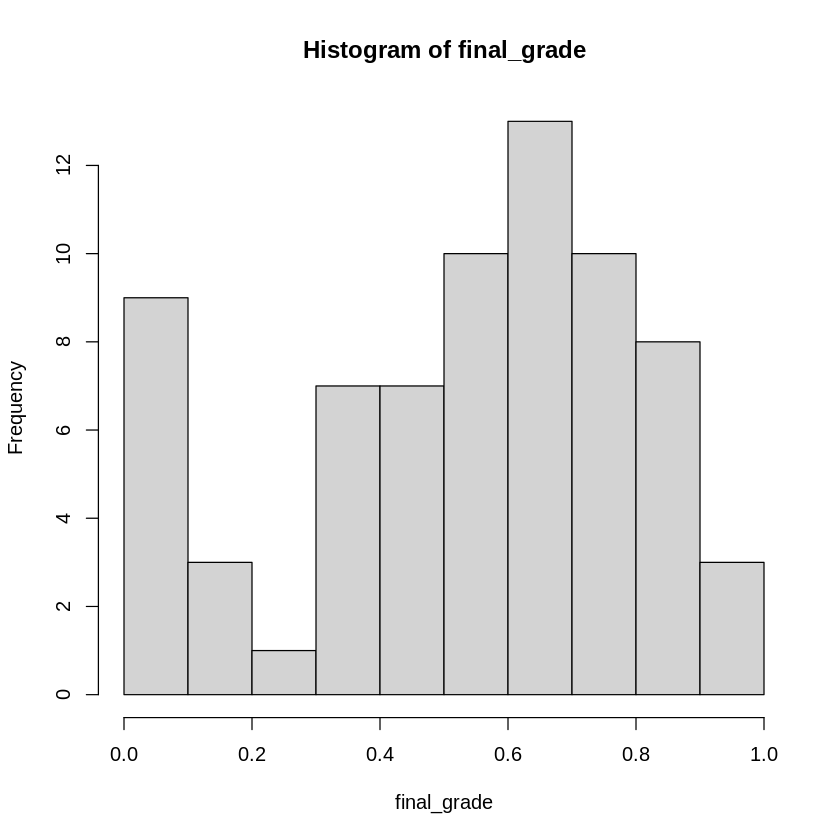

In [1]:
final_grade = c(
  0.0  , 54.0 , 46.5 , 0.0  , 37.0 , 9.0  , 56.5 , 42.3 , 70.5 , 76.5 , 0.0  ,
  37.5 , 57.5 , 62.0 , 87.5 , 0.0  , 94.5 , 75.6 , 14.5 , 41.1 , 91.5 , 90.5 ,
  73.0 , 68.0 , 52.0 , 19.5 , 65.5 , 51.0 , 64.0 , 39.0 , 79.3 , 66.0 , 69.5 ,
  33.8 , 44.5 , 51.9 , 38.8 , 52.2 , 45.0 , 66.5 , 64.5 , 56.7 , 0.0  , 87.0 ,
  27.5 , 63.7 , 49.0 , 16.2 , 0.0  , 84.2 , 53.5 , 80.5 , 37.5 , 0.0  , 87.5 ,
  56.0 , 74.5 , 85.5 , 70.0 , 88.5 , 69.5 , 83.8 , 61.5 , 32.0 , 65.5 , 78.0 ,
  47.5 , 73.0 , 79.2 , 76.0 , 0.0
)

# Normalize final_grade to be in [0,1].
final_grade = final_grade/100

hist(final_grade)

<div dir='rtl'>
مشاهده می‌کنیم که مقادیر صفر نمودار را از حالت طبیعی خارج کرده‌اند. دلیل این امر آن است که نمره غایبین امتحان واقعا از توزیع نمرات امتحان پیروی نمی‌کند. بنابراین خوب است اگر این مقادیر را از دادگان حذف کنیم.
</div>

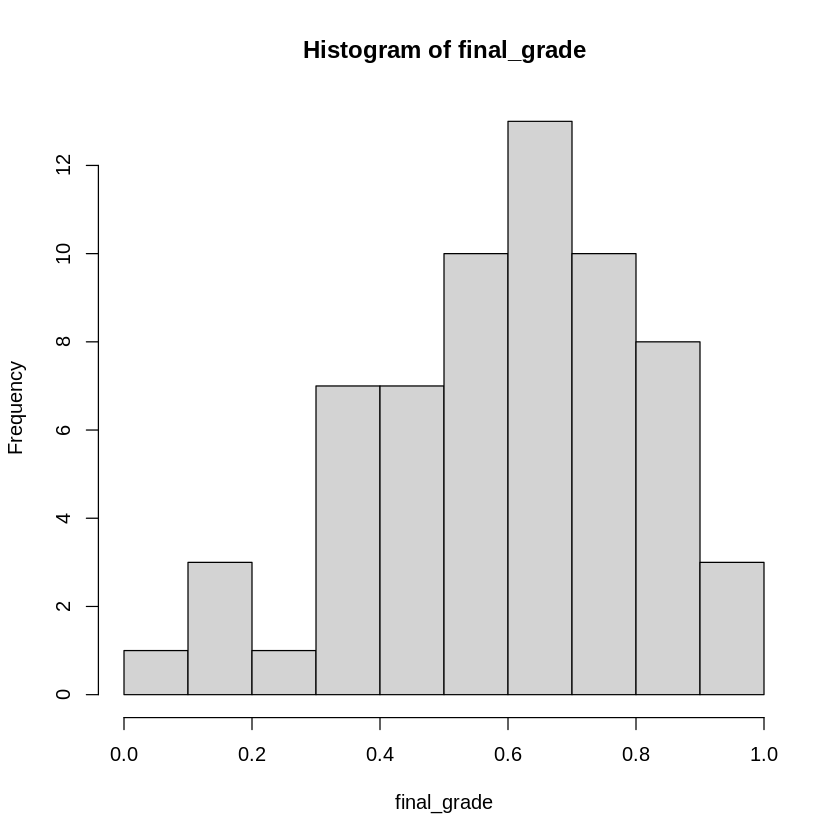

In [2]:
# Remove zero values from final_grade.

# Overwrite final_grade with its non-zero values.        

final_grade <- final_grade[final_grade != 0]

hist(final_grade)

In [3]:
install.packages("EnvStats")
library(EnvStats)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘nortest’



Attaching package: ‘EnvStats’


The following objects are masked from ‘package:stats’:

    predict, predict.lm


The following object is masked from ‘package:base’:

    print.default




In [4]:
# Estimate beta distribution parameters using `ebeta()` function which
# is defined in the EnvStats library.
beta_dist_estimation = ebeta(final_grade)

a = beta_dist_estimation$parameters["shape1"]
b = beta_dist_estimation$parameters["shape2"]

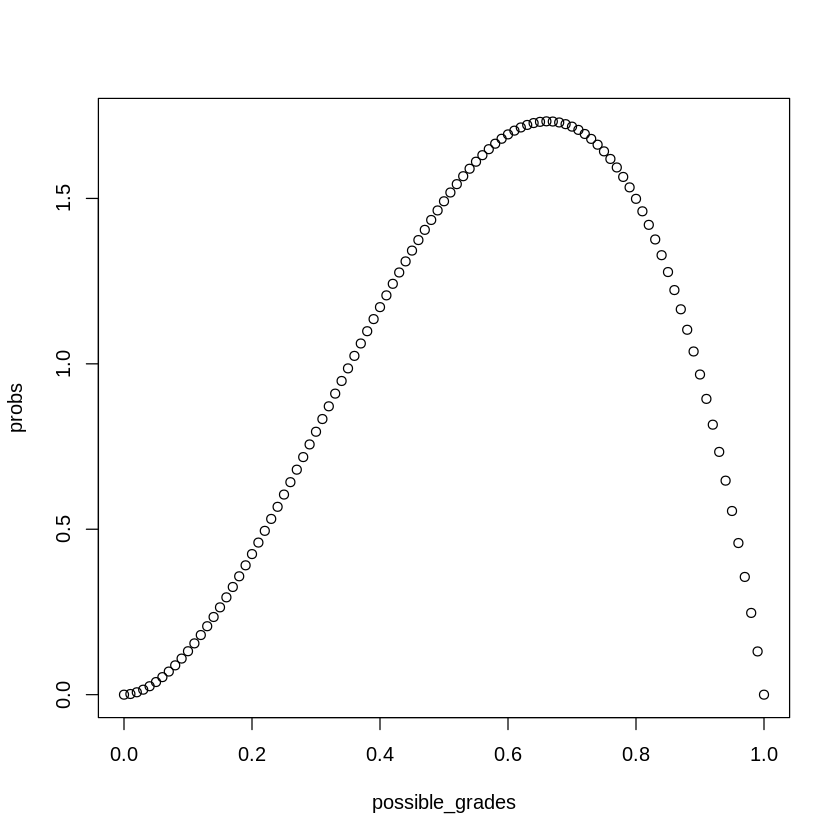

In [5]:
# Computing distribution density given the estimated parameters using `dbeta()`.
possible_grades = seq(0, 1, by = 0.01)


# Using `dbeta()`, compute a variable named `probs` as the    #
# density of the estimated beta distribution over the         #
# `possible_grades`. Google it to find the proper parameter   #
# setting:                                                    #
probs = dbeta(possible_grades, a, b, ncp = 0, log = FALSE)

plot(possible_grades, probs)

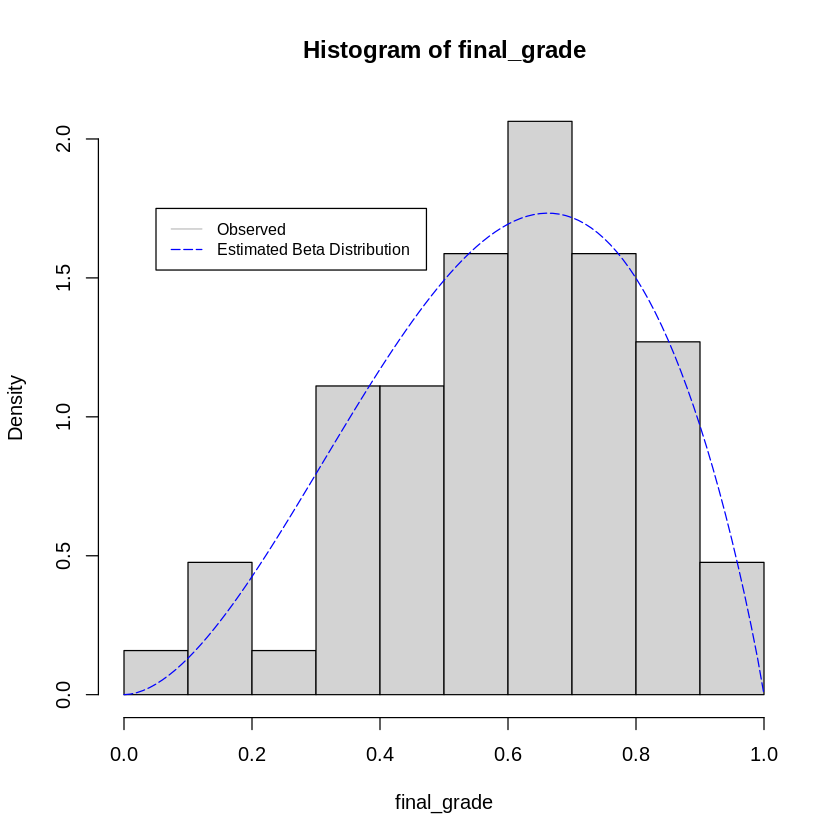

In [6]:
# Plot

hist(final_grade, freq = FALSE)
lines(possible_grades, probs, col = 'blue', lty=5)
legend(0.05, 1.75, legend=c("Observed", "Estimated Beta Distribution"),
       col=c("gray", "blue"), lty=c(1,5), cex=.8)